In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("students.csv")
df.head

<bound method NDFrame.head of                                 Student ID                 Name   Age  Gender  \
0     b37412a3-fa5c-40ca-b087-7109a47482d7                 Amit  21.0    Male   
1     65001423-faeb-4d19-a550-8ea26133a34d         Tina Ballard  19.0    Male   
2     228aaf1d-8710-4c8d-bfec-001b0df01f34                Meena  19.0  Female   
3     1aa67474-e200-4157-ad54-c95aaa4d52a8  Christopher Morales  23.0    Male   
4     5122db4a-14c8-44d7-b2f4-e869f69d3dd7            Siddharth  20.0    Male   
...                                    ...                  ...   ...     ...   
1995  27d7e5aa-dc11-40a7-9aff-586f00f8d55b                 Anil  19.0    Male   
1996  74f43a77-70a1-4e4c-a0c2-460d939618c9                Ramya  23.0  Female   
1997  88a613b4-a3b8-4f92-a3c9-0c6a86017633    Gregory Fernandez  18.0    Male   
1998  248c7b65-0c61-4277-9e95-44857b54d1a9               Vikram  22.0    Male   
1999  840d718e-de7b-4218-95bd-11db983c3cbd            Siddharth  20.0    Male  

In [3]:
df.columns

Index(['Student ID', 'Name', 'Age', 'Gender', 'Branch', 'Average GPA',
       'Backlogs', 'Attendance (%)', 'Clubs', 'Skills', 'Internship Done',
       'Internship Domain', 'Placement Status', 'Placement Domain',
       'CTC (LPA)', 'Alumni Path', 'Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA',
       'Sem4 GPA', 'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA'],
      dtype='str')

In [4]:
df.isnull().sum()

Student ID              1
Name                    0
Age                     1
Gender                  1
Branch                  1
Average GPA             1
Backlogs                1
Attendance (%)          1
Clubs                   1
Skills                  1
Internship Done         1
Internship Domain    1018
Placement Status        1
Placement Domain      968
CTC (LPA)               1
Alumni Path           968
Sem1 GPA                1
Sem2 GPA                1
Sem3 GPA                1
Sem4 GPA                1
Sem5 GPA                1
Sem6 GPA                1
Sem7 GPA                1
Sem8 GPA                1
dtype: int64

In [6]:
df.shape

(2000, 24)

In [8]:
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         1999 non-null   str    
 1   Name               2000 non-null   str    
 2   Age                1999 non-null   float64
 3   Gender             1999 non-null   str    
 4   Branch             1999 non-null   str    
 5   Average GPA        1999 non-null   float64
 6   Backlogs           1999 non-null   float64
 7   Attendance (%)     1999 non-null   float64
 8   Clubs              1999 non-null   str    
 9   Skills             1999 non-null   str    
 10  Internship Done    1999 non-null   str    
 11  Internship Domain  982 non-null    str    
 12  Placement Status   1999 non-null   str    
 13  Placement Domain   1032 non-null   str    
 14  CTC (LPA)          1999 non-null   float64
 15  Alumni Path        1032 non-null   str    
 16  Sem1 GPA           1999 non-null   

In [12]:
df["Placement Status"] = df["Placement Status"].map({"Not Placed":0,"Placed":1})

In [13]:
df.head()

,Student ID,Name,Age,Gender,Branch,Average GPA,Backlogs,Attendance (%),Clubs,Skills,...,CTC (LPA),Alumni Path,Sem1 GPA,Sem2 GPA,Sem3 GPA,Sem4 GPA,Sem5 GPA,Sem6 GPA,Sem7 GPA,Sem8 GPA
0,b37412a3-fa5c-40ca-b087-7109a47482d7,Amit,21.0,Male,MECH,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",...,0.00,NaN,8.34,5.24,6.06,7.81,7.18,7.04,8.26,5.99
1,65001423-faeb-4d19-a550-8ea26133a34d,Tina Ballard,19.0,Male,ECE,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",...,0.00,NaN,7.37,6.37,6.45,5.99,6.55,6.99,6.46,5.52
2,228aaf1d-8710-4c8d-bfec-001b0df01f34,Meena,19.0,Female,CIVIL,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",...,0.00,NaN,5.79,8.82,7.03,6.92,7.67,6.01,7.75,6.62
3,1aa67474-e200-4157-ad54-c95aaa4d52a8,Christopher Morales,23.0,Male,ECE,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",...,5.89,Research,7.90,4.26,8.19,7.52,8.32,6.80,4.94,7.43
4,5122db4a-14c8-44d7-b2f4-e869f69d3dd7,Siddharth,20.0,Male,EEE,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",...,0.00,NaN,6.86,6.24,7.64,7.15,5.91,6.18,8.19,8.54


In [14]:
df["Placement Status"] 

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    1.0
1999    0.0
Name: Placement Status, Length: 2000, dtype: float64

<Axes: xlabel='Placement Status', ylabel='count'>

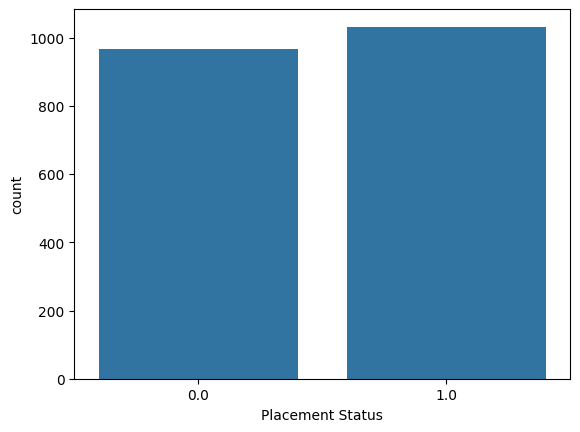

In [18]:
sns.countplot(data=df, x=df["Placement Status"])

In [22]:
target_col = "Placement Status"

In [26]:
df["Internship Done"] = df["Internship Done"].map({"Yes":1,"No":0})

In [27]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols.remove(target_col)

print("Numeric Features:", numeric_cols)

Numeric Features: ['Age', 'Average GPA', 'Backlogs', 'Attendance (%)', 'Internship Done', 'CTC (LPA)', 'Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA', 'Sem4 GPA', 'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA']


In [30]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

C:\Users\HP\AppData\Local\Temp\ipykernel_15380\1998440012.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()


['Student ID',
 'Name',
 'Gender',
 'Branch',
 'Clubs',
 'Skills',
 'Internship Domain',
 'Placement Domain',
 'Alumni Path']

In [31]:
le_domain = LabelEncoder()
df["Internship Domain"] = le_domain.fit_transform(df["Internship Domain"])


In [32]:
df["Internship Domain"]

0       0
1       6
2       4
3       6
4       3
       ..
1995    5
1996    6
1997    0
1998    0
1999    6
Name: Internship Domain, Length: 2000, dtype: int64

In [34]:
from sentence_transformers import SentenceTransformer

sbert = SentenceTransformer("all-MiniLM-L6-v2")
print("✅ SBERT Model Loaded")


c:\Users\HP\Desktop\tnp-portal\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\HP\Desktop\tnp-portal\.venv\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order 

✅ SBERT Model Loaded
